In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
#Load the data
from google.colab import files
uploaded = files.upload()


Saving NFLX.csv to NFLX.csv


In [3]:
#Store the data into a data frame
df = pd.read_csv('NFLX.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-10,519.729980,555.880005,511.279999,548.729980,548.729980,21605600
1,2020-07-13,567.979980,575.369995,520.960022,525.500000,525.500000,18399000
2,2020-07-14,517.080017,525.500000,490.489990,524.880005,524.880005,15083300
3,2020-07-15,516.299988,529.000000,510.179993,523.260010,523.260010,10066700
4,2020-07-16,526.479980,535.539978,504.359985,527.390015,527.390015,24499000
5,2020-07-17,494.869995,503.589996,484.140015,492.989990,492.989990,24991400


In [4]:
#Number of Trading days
df.shape


(252, 7)

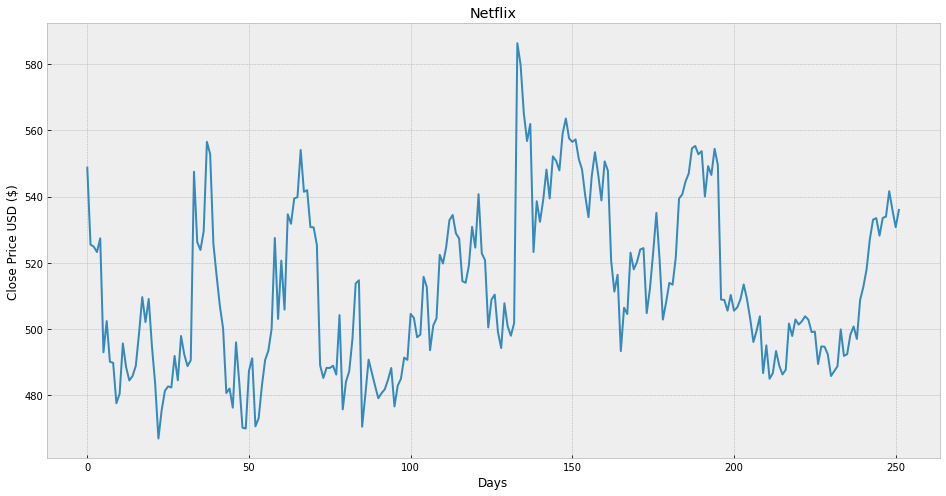

In [6]:
#Visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show()

In [8]:
#Get the Close Price
df = df[['Close']]
df.head(4)

,Close
0,548.729980
1,525.500000
2,524.880005
3,523.260010


In [13]:
#Create a variable to predict 'x' days out into the future
future_days = 25
#Create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Close,Prediction
248,541.640015,NaN
249,535.960022,NaN
250,530.760010,NaN
251,535.979980,NaN


In [16]:
#Create the feature data set (X) and convert it to a numpy array and remove the 'x' rows/days
x = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(x)

[[548.72998 ]
 [525.5     ]
 [524.880005]
 [523.26001 ]
 [527.390015]
 [492.98999 ]
 [502.410004]
 [490.100006]
 [489.820007]
 [477.579987]
 [480.450012]
 [495.649994]
 [488.51001 ]
 [484.480011]
 [485.799988]
 [488.880005]
 [498.619995]
 [509.640015]
 [502.109985]
 [509.079987]
 [494.730011]
 [483.380005]
 [466.929993]
 [475.470001]
 [481.329987]
 [482.679993]
 [482.350006]
 [491.869995]
 [484.529999]
 [497.899994]
 [492.309998]
 [488.809998]
 [490.579987]
 [547.530029]
 [526.27002 ]
 [523.890015]
 [529.559998]
 [556.549988]
 [552.840027]
 [525.75    ]
 [516.049988]
 [507.019989]
 [500.190002]
 [480.670013]
 [482.029999]
 [476.26001 ]
 [495.98999 ]
 [483.859985]
 [470.200012]
 [469.959991]
 [487.350006]
 [491.170013]
 [470.609985]
 [473.079987]
 [482.880005]
 [490.649994]
 [493.480011]
 [500.029999]
 [527.51001 ]
 [503.059998]
 [520.650024]
 [505.869995]
 [534.659973]
 [531.789978]
 [539.440002]
 [539.809998]
 [554.090027]
 [541.450012]
 [541.940002]
 [530.789978]
 [530.719971]
 [525.

In [17]:
#Create the target data set (y) and convert it to a numpy array and get all of the target values except the last 'x' rows/days.
y = np.array(df['Prediction'])[:-future_days]
print(y)

[482.679993 482.350006 491.869995 484.529999 497.899994 492.309998
 488.809998 490.579987 547.530029 526.27002  523.890015 529.559998
 556.549988 552.840027 525.75     516.049988 507.019989 500.190002
 480.670013 482.029999 476.26001  495.98999  483.859985 470.200012
 469.959991 487.350006 491.170013 470.609985 473.079987 482.880005
 490.649994 493.480011 500.029999 527.51001  503.059998 520.650024
 505.869995 534.659973 531.789978 539.440002 539.809998 554.090027
 541.450012 541.940002 530.789978 530.719971 525.419983 489.049988
 485.230011 488.279999 488.23999  488.929993 486.23999  504.209991
 475.73999  484.119995 487.220001 496.950012 513.76001  514.72998
 470.5      480.23999  490.76001  486.769989 482.839996 479.100006
 480.630005 481.790009 484.670013 488.23999  476.619995 482.880005
 485.       491.359985 490.700012 504.579987 503.380005 497.519989
 498.309998 515.780029 512.659973 493.600006 501.089996 503.220001
 522.419983 519.780029 524.830017 532.900024 534.450012 528.909

In [20]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [22]:
#Create the models
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [25]:
#Get the last 'x' rows of the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[509.      ],
       [513.469971],
       [509.109985],
       [503.179993],
       [496.079987],
       [499.549988],
       [503.839996],
       [486.690002],
       [495.079987],
       [484.980011],
       [486.660004],
       [493.369995],
       [488.940002],
       [486.279999],
       [487.700012],
       [501.670013],
       [497.890015],
       [502.899994],
       [501.339996],
       [502.359985],
       [503.859985],
       [502.809998],
       [499.079987],
       [499.23999 ],
       [489.429993]])

In [26]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction) 

[482.029999 494.660004 492.390015 485.809998 487.269989 488.769989
 498.309998 500.769989 492.410004 498.339996 500.769989 497.
 508.820007 512.73999  518.059998 527.070007 482.880005 533.5
 501.769989 533.539978 498.309998 541.640015 535.960022 530.76001
 535.97998 ]

[513.26898345 513.75584654 513.28096286 512.6350763  511.86175341
 512.23970115 512.70696291 510.83900917 511.75283479 510.6527593
 510.83574183 511.56658481 511.08407607 510.7943522  510.94901807
 512.47061135 512.05889917 512.60457919 512.43466635 512.54576215
 512.70914009 512.59477695 512.18850928 512.20593659 511.13744522]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


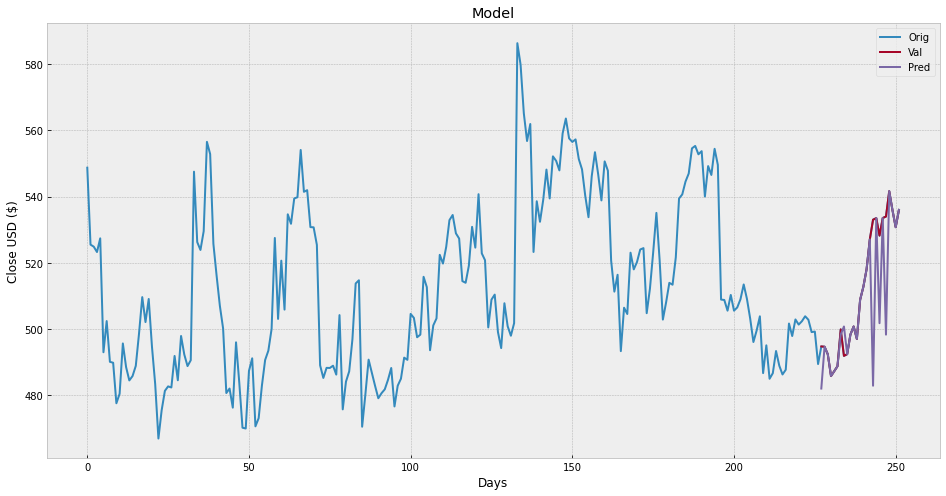

In [28]:
#Visualize the data
prediction = tree_prediction

valid = df[x.shape[0]:]
valid['Prediction'] = prediction
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


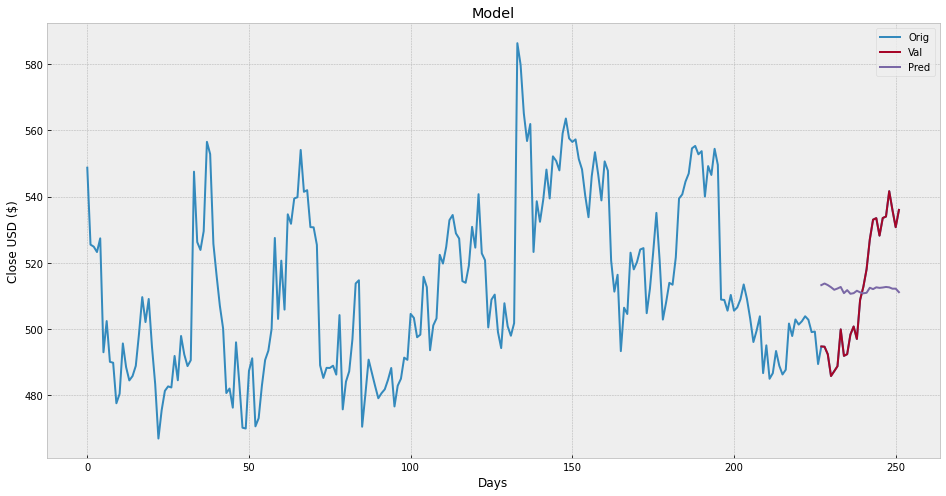

In [29]:
#Visualize the data
prediction = lr_prediction

valid = df[x.shape[0]:]
valid['Prediction'] = prediction
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()